# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | concepcion del oro
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | san andres
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | petr

Processing Record 42 of Set 4 | severo-yeniseyskiy
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | carnaiba
Processing Record 45 of Set 4 | tafuna
Processing Record 46 of Set 4 | woolgoolga
Processing Record 47 of Set 4 | yangambi
Processing Record 48 of Set 4 | kampong speu
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | happy valley-goose bay
Processing Record 1 of Set 5 | chui
Processing Record 2 of Set 5 | beira
Processing Record 3 of Set 5 | qaqortoq
Processing Record 4 of Set 5 | hawaiian paradise park
Processing Record 5 of Set 5 | rikaze
Processing Record 6 of Set 5 | les avirons
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | dahab
Processing Record 9 of Set 5 | nantucket
Processing Record 10 of Set 5 | colonia
Processing Record 11 of Set 5 | kudahuvadhoo
Processing Record 12 of Set 5 | sovetskiy
Processing Record 13 of Set 5 | castro
Processing Record 14 of Set 5 | salekhard
Processing Record 15 of Set

Processing Record 35 of Set 8 | ta`u
Processing Record 36 of Set 8 | gravina in puglia
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | kailua-kona
Processing Record 39 of Set 8 | cody
Processing Record 40 of Set 8 | dolores
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | minas de marcona
Processing Record 43 of Set 8 | aberystwyth
Processing Record 44 of Set 8 | nkhotakota
Processing Record 45 of Set 8 | palikir - national government center
Processing Record 46 of Set 8 | whangarei
Processing Record 47 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 48 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 49 of Set 8 | zhigalovo
Processing Record 0 of Set 9 | saint croix
Processing Record 1 of Set 9 | labuan
Processing Record 2 of Set 9 | wahlstedt
Processing Record 3 of Set 9 | myskhako
Processing Record 4 of Set 9 | cozumel
Processing Record 5 of Set 9 | camiri
Processing Record 6 of Set 9 | safford
Proce

Processing Record 22 of Set 12 | debre tabor
Processing Record 23 of Set 12 | bima
Processing Record 24 of Set 12 | alvaraes
Processing Record 25 of Set 12 | praya
Processing Record 26 of Set 12 | ketchikan
Processing Record 27 of Set 12 | cabras
Processing Record 28 of Set 12 | xapuri
Processing Record 29 of Set 12 | vicam
Processing Record 30 of Set 12 | popondetta
Processing Record 31 of Set 12 | nuwara eliya
Processing Record 32 of Set 12 | gadzhiyevo
Processing Record 33 of Set 12 | gallivare
City not found. Skipping...
Processing Record 34 of Set 12 | kshenskiy
Processing Record 35 of Set 12 | kaiapoi
Processing Record 36 of Set 12 | ziniare
Processing Record 37 of Set 12 | kabo
Processing Record 38 of Set 12 | kalmunai
Processing Record 39 of Set 12 | wilmington island
Processing Record 40 of Set 12 | satipo
Processing Record 41 of Set 12 | tqvarch'eli
Processing Record 42 of Set 12 | ariquemes
Processing Record 43 of Set 12 | callao
Processing Record 44 of Set 12 | diglur
Proce

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [33]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
381,nkhotakota,-12.9274,34.2961,22.75,83,37,2.98,MW,1681924586
164,smithers,54.7804,-127.1743,0.18,100,100,1.03,CA,1681924518
582,canitas de felipe pescador,23.6000,-102.7167,24.71,15,33,3.98,MX,1681924620
319,ust'-ilimsk,58.0006,102.6619,-7.74,90,100,5.34,RU,1681924573
53,tiksi,71.6872,128.8694,-22.26,100,100,1.75,RU,1681924528
127,veraval,20.9000,70.3667,27.92,63,0,6.76,IN,1681924543
209,salekhard,66.5300,66.6019,-11.60,95,66,1.97,RU,1681924553
57,santa cruz,-17.8000,-63.1667,21.70,94,100,6.69,BO,1681924529
39,georgetown,5.4112,100.3354,28.96,74,20,1.54,MY,1681924291


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
218,fort hood,31.1349,-97.7756,26.19,71,75,7.72,US,1681924411
320,lihue,21.9789,-159.3672,20.58,90,20,5.14,US,1681924573
456,ustyuzhna,58.8394,36.4321,8.22,62,88,2.03,RU,1681924600
433,imbituba,-28.2400,-48.6703,24.36,28,20,3.01,BR,1681924596
353,boa vista,2.8197,-60.6733,31.99,48,40,5.14,BR,1681924327
288,pacanga,-7.1667,-79.5000,30.13,55,96,3.74,PE,1681924567
50,moissala,8.3404,17.7663,35.06,27,100,2.49,TD,1681924527
279,payyannur,12.1000,75.2000,27.30,82,14,1.05,IN,1681924564
308,zinjibar,13.1287,45.3807,28.94,61,0,4.52,YE,1681924571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

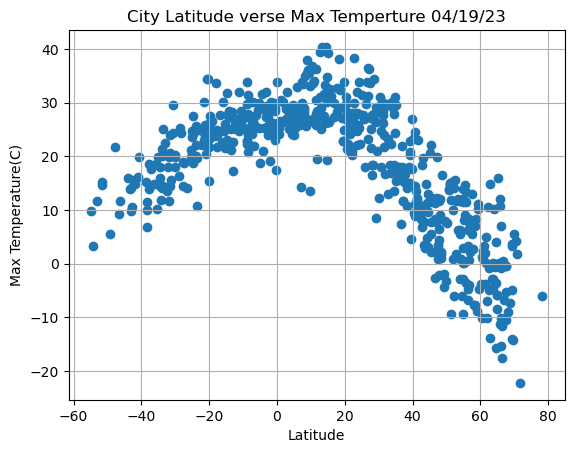

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude verse Max Temperture " + time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

TypeError: bad operand type for unary +: 'str'

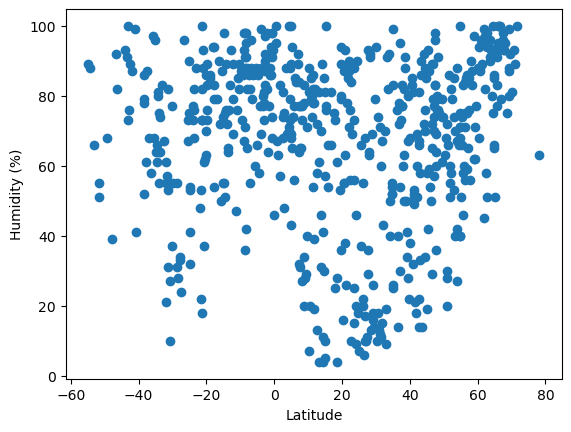

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity" + + time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

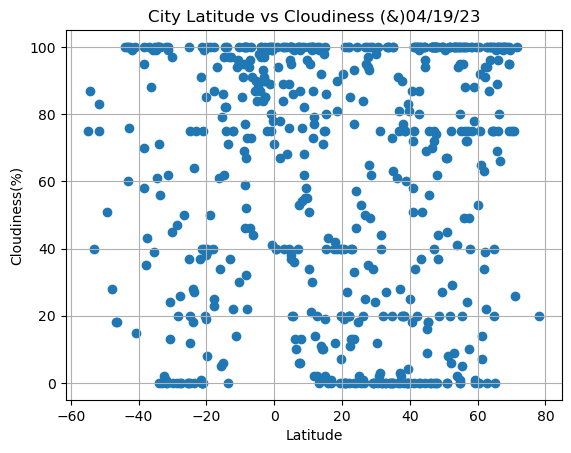

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (&)" + time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

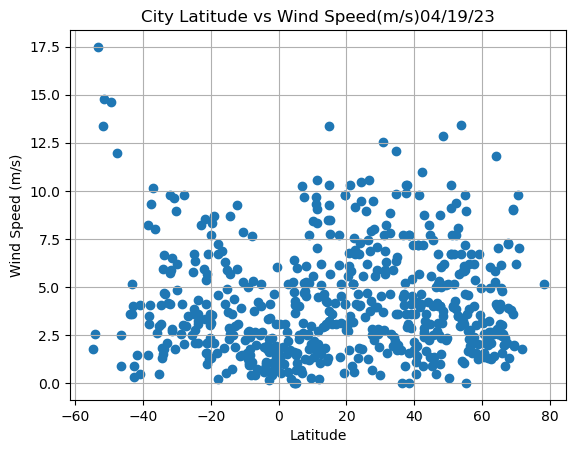

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed(m/s)" + time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
 
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),5)}")
    
    
   

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
 
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - Linear Regression of {y_label} verse {x_label} "  + time.strftime("%x"))
    plt.annotate(line_eq, location, color="red")

In [107]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,thompson,55.7435,-97.8558,-3.54,83,100,4.56,CA,1681924374
2,concepcion del oro,24.6333,-101.4167,22.35,18,18,1.78,MX,1681924512
4,albany,42.6001,-73.9662,8.25,66,80,0.89,US,1681924504
5,stanley,54.8680,-1.6985,11.55,68,0,4.63,GB,1681924448
6,whitehorse,60.7161,-135.0538,2.43,87,75,1.54,CA,1681924334


In [108]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.67,68,100,10.13,SH,1681924512
3,port-aux-francais,-49.3500,70.2167,5.54,68,51,14.60,TF,1681924513
9,waitangi,-43.9535,-176.5597,16.01,93,100,3.58,NZ,1681924514
10,ancud,-41.8697,-73.8203,14.81,87,99,1.44,CL,1681924496
11,ushuaia,-54.8000,-68.3000,9.79,89,75,1.75,AR,1681924102


###  Temperature vs. Latitude Linear Regression Plot

In [112]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°)", "Northern", (x_values.min(), y_values.max()))

plt.savefig("output_data/regression/fig1.png")
plt.show()

TypeError: 'tuple' object is not callable

In [120]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°C)", "Southern", (x_values.min(), y_values.max()))

plt.show()


TypeError: 'tuple' object is not callable

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [123]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

In [124]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [125]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

In [126]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

TypeError: 'tuple' object is not callable

**Discussion about the linear relationship:** YOUR RESPONSE HERE